## Drawing Edgeworth Box

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
def Edgeworth_box(u1, u2, V1, V2, clev1,clev2, ttl, ttl_margin= 1, top=0.7):
    # u1: the total amount of good 1
    # u2: the total amount of good 2
    # V1: levels of utility for consumer 1
    # V2: levels of utility for consumer 2
    # clev1: levels of contours (for consumer 1) you are interested in
    # clev2: levels of contours (for consumer 2) you are interested in
    # ttl: a title
    # ttl_margin: space added for the title
    # top: a location where the graph starts (if top=1, the title and the graph will overlap)
    xtcks = np.arange(0, u1+1)
    ytcks = np.arange(0,u2+1)

    # Adjustment of the title is bit annoying when we try to set xlabel on the top
    fig = plt.figure(figsize = (u1, u2+ttl_margin))
    ax1 = fig.add_subplot(1,1,1)
    fig.subplots_adjust(top=top)
    fig.suptitle(ttl)

    col1 = 'tab:red'
    col2 = 'tab:blue'
 
    plt.contour(X1, X2, V1,clev1,  linewidths = 1, colors=col1, linestyles = 'dashed')
    plt.contour(X1, X2, V2,clev2,  linewidths = 1, colors = col2, linestyles = 'dashed')
    plt.xlim([0,u1])
    plt.ylim([0,u2])
    plt.xlabel('$x_{1,1}$', color = col1, fontsize = 13)
    plt.ylabel('$x_{1,2}$', color = col1, fontsize = 13)
    plt.xticks(xtcks, color = col1)
    plt.yticks(ytcks, color = col1)

    ax1 = plt.gca()
    ax2 = plt.twinx(ax1)
    plt.ylabel('$x_{2,2}$', color=col2 , fontsize = 13)
    plt.yticks(ytcks,ytcks[::-1], color = col2)

    # It's a bit hacky, but the following looks an easy way. 
    ax3 = plt.twiny(ax1)
    plt.xlabel('$x_{2,1}$', color=col2, fontsize = 13)
    plt.xticks(xtcks,xtcks[::-1], color = col2)

    return fig

### Edgeworth Box under Homothetic Preferences
- ##### Q: Is a contract curve of homothetic preferences always a diagonal line of the Edgeworth Box ?
- ##### A: If preferences are identical and strictly convex (i.e., strictly (quasi-) concave utility functions), Yes

##### Example with CES
(with the same weights on two goods. )

In [2]:
def CES(x,y,dlt):
    return (x**dlt)/dlt + (y**dlt)/dlt
def Cobb_Douglas(x, y, al, bet):
    return (x**al)*(y**bet)

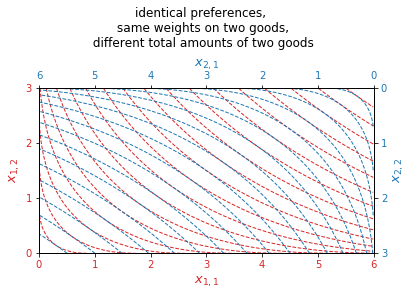

In [4]:
l1 = 0.00000001
u1 = 6
u2 = 3
x1 = np.arange(l1, u1, 0.01)
x2 = np.arange(l1, u2, 0.01)
X1, X2 = np.meshgrid(x1, x2)

dlt = 0.5
dlt2 = 0.5
V1 = CES(X1, X2, dlt)
V2 = CES(u1-X1, u2-X2, dlt2)

x = np.arange(l1, u1, 0.3)
xr = u1-x[::-1] # to use the same contours. 
clev1 = CES(x, (u2/u1)*x, dlt)
clev2 = CES(xr, (u2/u1)*xr, dlt2)

ttl = 'identical preferences,\n same weights on two goods,\n different total amounts of two goods'
fig = Edgeworth_box(u1, u2, V1, V2, clev1,clev2, ttl)
plt.savefig('Edgeworth_identical1.png')

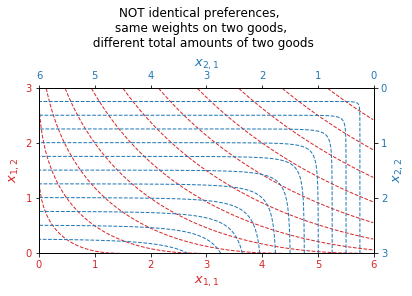

In [5]:
l1 = 0.00000001
u1 = 6
u2 = 3
x1 = np.arange(l1, u1, 0.01)
x2 = np.arange(l1, u2, 0.01)
X1, X2 = np.meshgrid(x1, x2)

dlt = 0.5
dlt2 = -5
V1 = CES(X1, X2, dlt)
V2 = CES(u1-X1, u2-X2, dlt2)

x = np.arange(l1, u1, 0.5)
clev1 = CES(x, (u2/u1)*x, dlt)
clev2 = CES(x, (u2/u1)*x, dlt2)

ttl = 'NOT identical preferences, \n same weights on two goods, \n different total amounts of two goods'
fig = Edgeworth_box(u1, u2, V1, V2, clev1,clev2, ttl)

plt.savefig('Edgeworth_not_identical1.png')

In the above graph, weights on two goods are the same, but complementarity for each consumer are different. (Consumer 2 feels higher complementaryty than Consumer 1) 

##### Example with Cobb-Douglas
(With different weights for two goods.)

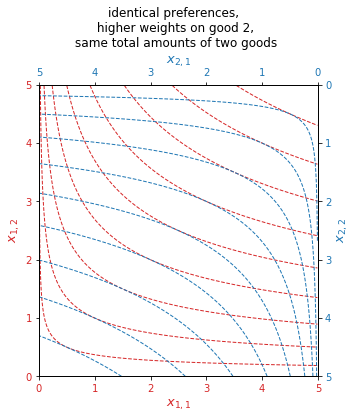

In [6]:
l1 = 0.00000001
u1 = 5
u2 = 5
x1 = np.arange(l1, u1, 0.01)
x2 = np.arange(l1, u2, 0.01)
X1, X2 = np.meshgrid(x1, x2)

xtcks = np.arange(0, u1+1)
ytcks = np.arange(0,u2+1)


al = 0.3
bet = 0.7
V1 = Cobb_Douglas(X1, X2, al, bet)
V2 = Cobb_Douglas(u1-X1, u2-X2, al, bet)

x = np.arange(l1, u1, 0.5)
clev1 = Cobb_Douglas(x, (u2/u1)*x, al, bet)
clev2 = Cobb_Douglas(x, (u2/u1)*x, al, bet)

ttl = 'identical preferences,\n higher weights on good 2,\n same total amounts of two goods'
fig = Edgeworth_box(u1, u2, V1, V2, clev1,clev2, ttl, top = 0.8)

plt.savefig('Edgeworth_identical2.png')

Even if goods 2 is more important, the contract curve is still diagonal since prefernces are identical and homothetic (and strictly convex) 


If we use different weigts for two consumers, then we have a different contract curve.

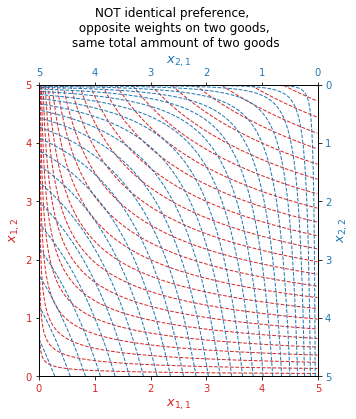

In [7]:
l1 = 0.00000001
u1 = 5
u2 = 5
x1 = np.arange(l1, u1, 0.01)
x2 = np.arange(l1, u2, 0.01)
X1, X2 = np.meshgrid(x1, x2)

al = 0.3
bet = 0.7
asym = 0.4
V1 = Cobb_Douglas(X1, X2, al, bet)
V2 = Cobb_Douglas(u1-X1, u2-X2, al+asym, bet-asym)

x = np.arange(l1, u1, 0.2)
clev1 = Cobb_Douglas(x, (u2/u1)*x, al, bet)
clev2 = Cobb_Douglas(x, (u2/u1)*x, al+asym, bet-asym)

ttl = 'NOT identical preference, \n opposite weights on two goods, \n same total ammount of two goods'
fig = Edgeworth_box(u1, u2, V1, V2, clev1,clev2, ttl, top = 0.8)

plt.savefig('Edgeworth_not_identical2.png')